In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:3]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0


## Quest_1
### 기준: 날짜_입원일자/퇴원일자
    - 주별 환자 입원/퇴원 추이 시각화 
    - 요일별 환자 입원/퇴원 추이 시각화

In [3]:
df_ROS['입원일자']

0       20190713
1       20190715
2       20190729
3       20190731
4       20190903
          ...   
1889    20170407
1890    20170426
1891    20170410
1892    20170408
1893    20170412
Name: 입원일자, Length: 1894, dtype: int64

In [4]:
df_ROS.info() ## 환자ID , 입원일자, 퇴원일자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [5]:
df_ROS['입원일자']= df_ROS['입원일자'].astype(str)

In [6]:
df_ROS['퇴원일자']= df_ROS['퇴원일자'].astype(str)

In [7]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

In [8]:
df_ROS['입원_datetime']=pd.to_datetime(df_ROS['입원일자'])
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,입원_datetime
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0,2019-07-13
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0,2019-07-15


In [9]:
df_ROS['퇴원_datetime']=pd.to_datetime(df_ROS['퇴원일자'])
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,입원_datetime,퇴원_datetime
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,36.6,14.4,0,-1.01,2048.50,4,Down,0,2019-07-13,2019-07-16
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,7.2,17.8,0,-1.14,1753.10,4,Up,0,2019-07-15,2019-07-16
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,27.3,10.2,0,-1.77,1749.00,4,Down,0,2019-07-29,2019-08-01
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,18.7,19.9,0,-1.58,1796.20,4,Down,0,2019-07-31,2019-08-03
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,14.7,5.2,0,-0.79,2021.48,4,Up,0,2019-09-03,2019-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,23.0,21.8,0,NaN,2652.20,5,Middle,0,2017-04-07,2017-04-08
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,20.2,5.0,0,NaN,1795.80,4,Down,0,2017-04-26,2017-04-29
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,15.0,17.4,1,NaN,2624.40,4,Down,0,2017-04-10,2017-04-12
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,11.1,17.7,0,NaN,1972.50,5,Down,0,2017-04-08,2017-04-11


In [10]:
## 입원_주별
df_ROS['입원_주'] = df_ROS['입원_datetime'].dt.isocalendar().week

In [11]:
## 퇴원_주별
df_ROS['퇴원_주'] = df_ROS['퇴원_datetime'].dt.isocalendar().week

In [12]:
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,입원_datetime,퇴원_datetime,입원_주,퇴원_주
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,0,-1.01,2048.5,4,Down,0,2019-07-13,2019-07-16,28,29
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,-1.14,1753.1,4,Up,0,2019-07-15,2019-07-16,29,29


In [13]:
df_ROS.describe()

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추전방위증,입원_주,퇴원_주
count,1894.000000,1894.000000,1894.000000,462.000000,1843.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,...,1890.000000,1890.000000,1893.000000,1894.000000,998.000000,1893.000000,1894.000000,1894.000000,1894.0,1894.0
mean,946.500000,39.270750,2.295671,31.142857,0.049919,0.020063,0.130940,0.302534,0.062830,0.004224,...,46.593651,16.329841,15.287934,0.056494,-1.507325,1989.788774,4.430834,0.032207,24.027983,23.748152
std,546.895023,13.675874,0.996143,10.131304,0.217836,0.140254,0.337424,0.638461,0.242721,0.064871,...,22.736211,8.421322,10.426397,0.230935,0.495867,314.478436,3.595680,0.176596,16.404609,16.339001
min,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.900000,-10.600000,-27.400000,0.000000,-2.840000,1145.800000,1.000000,0.000000,1.0,1.0
25%,473.250000,30.700000,1.000000,24.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.700000,10.500000,8.800000,0.000000,-1.820000,1777.000000,4.000000,0.000000,9.0,9.0
50%,946.500000,40.200000,2.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.100000,15.700000,14.500000,0.000000,-1.520000,1985.500000,4.000000,0.000000,22.0,22.0
75%,1419.750000,48.600000,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52.000000,21.400000,21.100000,0.000000,-1.202500,2178.500000,4.000000,0.000000,40.0,40.0
max,1893.000000,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,559.000000,48.700000,165.000000,1.000000,1.700000,3214.200000,45.000000,1.000000,52.0,53.0


In [14]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              1894 non-null   int64         
 1   환자ID                    1894 non-null   object        
 2   Large Lymphocyte        1894 non-null   float64       
 3   Location of herniation  1894 non-null   int64         
 4   ODI                     462 non-null    float64       
 5   가족력                     1843 non-null   float64       
 6   간질성폐질환                  1894 non-null   int64         
 7   고혈압여부                   1894 non-null   int64         
 8   과거수술횟수                  1894 non-null   int64         
 9   당뇨여부                    1894 non-null   int64         
 10  말초동맥질환여부                1894 non-null   int64         
 11  빈혈여부                    1894 non-null   int64         
 12  성별                      1894 non-null   int64   

In [15]:
df_ROS['입원_주'] = df_ROS['입원_주'].astype(str)

In [16]:
df_ROS['퇴원_주'] = df_ROS['퇴원_주'].astype(str)

In [17]:
df_in_pivot=pd.pivot_table(data=df_ROS, index='입원_주', aggfunc=len)
df_in_pivot

,Instability,Large Lymphocyte,Location of herniation,MF + ES,Modic change,ODI,PI,PT,Seg Angle(raw),Unnamed: 0,...,퇴원_datetime,퇴원_주,퇴원일자,헤모글로빈수치,혈액형,혈전합병증여부,환자ID,환자통증정도,후방디스크높이(mm),흡연여부
입원_주,,,,,,,,,,,,,,,,,,,,,
1,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
10,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
11,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
12,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
13,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
14,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
15,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
16,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
17,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


In [18]:
df_out_pivot=pd.pivot_table(data=df_ROS, index='퇴원_주', aggfunc=len)
df_out_pivot

,Instability,Large Lymphocyte,Location of herniation,MF + ES,Modic change,ODI,PI,PT,Seg Angle(raw),Unnamed: 0,...,통증기간(월),퇴원_datetime,퇴원일자,헤모글로빈수치,혈액형,혈전합병증여부,환자ID,환자통증정도,후방디스크높이(mm),흡연여부
퇴원_주,,,,,,,,,,,,,,,,,,,,,
1,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
10,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
11,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
12,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
13,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
14,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
15,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
16,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
17,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19


In [19]:
df_out_pivot['퇴원_주'] = df_out_pivot.index

In [20]:
df_in_pivot['입원_주'] = df_in_pivot.index

In [21]:
df_inout = df_in_pivot[['입원_주']]

In [22]:
df_inout = df_out_pivot[['퇴원_주']]

In [23]:
df_inout['입원수'] = df_in_pivot[['환자ID']]

C:\Users\01-15\AppData\Local\Temp\ipykernel_12504\2484728773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inout['입원수'] = df_in_pivot[['환자ID']]


In [24]:
df_inout['퇴원수'] = df_out_pivot[['환자ID']]

C:\Users\01-15\AppData\Local\Temp\ipykernel_12504\3263243651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inout['퇴원수'] = df_out_pivot[['환자ID']]


In [27]:
df_inout['주차'] = df_inout.index

C:\Users\01-15\AppData\Local\Temp\ipykernel_12504\3947249418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inout['주차'] = df_inout.index


<Axes: xlabel='주차', ylabel='Count'>

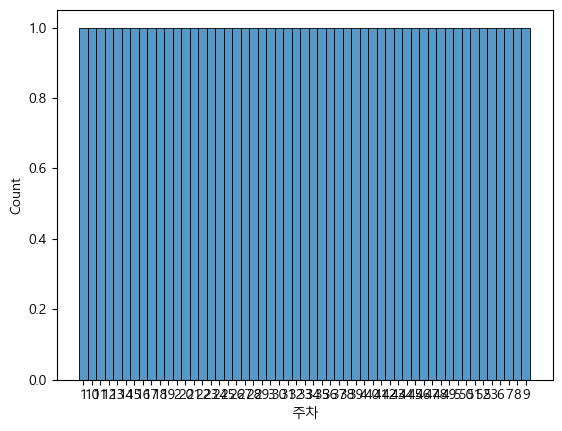

In [31]:
sns.histplot(data=df_inout, x='주차', )

#### histplot으로 

In [ ]:
df_in_pivot=pd.pivot_table(data=df_ROS, index='입원_주', values='Unnamed: 0', aggfunc=('count','mean'))
df_in_pivot

In [ ]:
df_out_pivot=pd.pivot_table(data=df_ROS, index='퇴원_주', values='Unnamed: 0', aggfunc=('count','mean'))
df_out_pivot

In [ ]:
df_ROS.info()

In [ ]:
df_ROS['입원요일']=df_ROS['입원_datetime'].dt.day_name()

In [ ]:
df_ROS['퇴원요일']=df_ROS['퇴원_datetime'].dt.day_name()

In [ ]:
df_ROS[:2]

In [ ]:
df_in_weekday=pd.pivot_table(data=df_ROS, index='입원요일', values='Unnamed: 0',  aggfunc='count')
df_in_weekday

In [ ]:
sns.barplot(data=df_in_weekday, x='입원요일', y='Unnamed: 0')